In [13]:
import pickle
import numpy as np
# Load validation sentence data
sent = pickle.load(open("val_sentences.pkl", "rb"))
# Load validation embeddings
emb  = np.load("val_embeddings.npy")

You need to install vg in order to run the cell below.

```
git clone git@github.com:gchrupala/vgs.git
cd vgs
python3 setup.py develop --user
```

In [14]:
# Compute scores for paraphrase retrieval
from vg.evaluate import paraphrase_ranking
N = len(sent)
correct = np.zeros((N, N)).astype(bool)

In [15]:
for i in range(N):
    for j in range(N):
        if sent[i]['imgid'] == sent[j]['imgid'] and i != j:
                correct[i, j] = True

In [16]:
result = paraphrase_ranking(emb, correct)
print("Median rank: {}".format(np.median(result['ranks'])))
print("Recall @ 10: {}".format(np.mean(result['recall'][10])))

Median rank: 20.0
Recall @ 10: 0.1263


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(emb)
print(pca.explained_variance_)

[0.6780892  0.09926844]


In [18]:
# Results for just the 2D projected embeddings
result = paraphrase_ranking(X, correct)
print("Median rank: {}".format(np.median(result['ranks'])))
print("Recall @ 10: {}".format(np.mean(result['recall'][10])))

Median rank: 10.0
Recall @ 10: 0.20775


In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


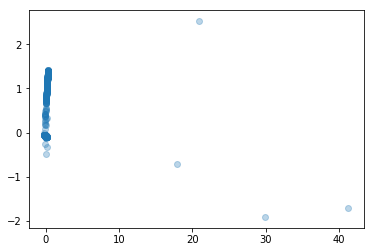

In [20]:
# What does the PCA space look like

scatter(X[:, 0], X[:,1], alpha=0.3)

In [21]:
# The retrieval scores are pretty decent
# Let's see some nearest neighbors
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(X)
for i in range(0, 1000, 200):
    print(sent[i]['raw'])
    for k in range(1, 15):
        j = sim[i].argsort()[-k]
        if i != j:
            print(correct[i][j], sim[i,j], sent[j]['raw'])
    print()
    

the boy laying face down on a skateboard is being pushed along the ground by another boy .
False 0.99975026 A white dog with beige spots is running through a field .
False 0.99971604 A large blue building has black smoke billowing out and a fire engine sits in front .
False 0.98300713 With the sun reflecting off the water , a man is sitting in a boat and rowing .
False 0.7873286 The dog is rolling on its back on the grass with its mouth wide open .
False 0.6452333 A young boy and a young girl walking towards each other
False 0.6445533 A black dog with a red collar is jumping out of the water .
False 0.6441525 Two people jump up and down on a cliff overlooking a valley .
False 0.6439247 A little girl and boy play Frisbee together in a grassy area .
False 0.6438421 A little boy and a little girl playing together outside .
False 0.64281017 A woman in a blue jacket is riding a bicycle on a woodland path .
False 0.64269555 A black dog with a red collar is jumping in the water .
False 0.6425